In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sportsref.baseball import Season
import seaborn as sns
from matplotlib.patches import Ellipse, Polygon

In [2]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.05)

In [3]:
szn2021 = Season(2021)

In [4]:
bat21 = szn2021.batting_pages('standard').get_df('teams_standard_batting')

Available tables: ['teams_standard_batting', 'players_standard_batting']


In [11]:
plot_df = bat21.query('Tm != "LgAvg"')
plot_df = plot_df.rename({'OPS+': 'ops_plus'}, axis=1)

In [12]:
plot_df.head()

,Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,...,SLG,OPS,ops_plus,TB,GDP,HBP,SH,SF,IBB,LOB
0,ARI,41,29.4,4.27,51,1945,1729,218,399,89,...,0.385,0.691,90,665,34,23,7,12,6,362
1,ATL,39,27.6,4.92,49,1832,1610,241,380,78,...,0.442,0.759,101,712,29,28,12,14,15,306
2,BAL,36,27.1,3.88,50,1848,1668,194,389,89,...,0.382,0.682,90,638,28,15,7,10,3,324
3,BOS,31,28.1,5.18,50,1877,1702,259,442,107,...,0.445,0.767,111,758,37,22,2,12,7,314
4,CHC,41,29.3,4.61,49,1849,1615,226,387,71,...,0.406,0.728,105,656,33,32,13,17,8,326


In [13]:
plt.xkcd()

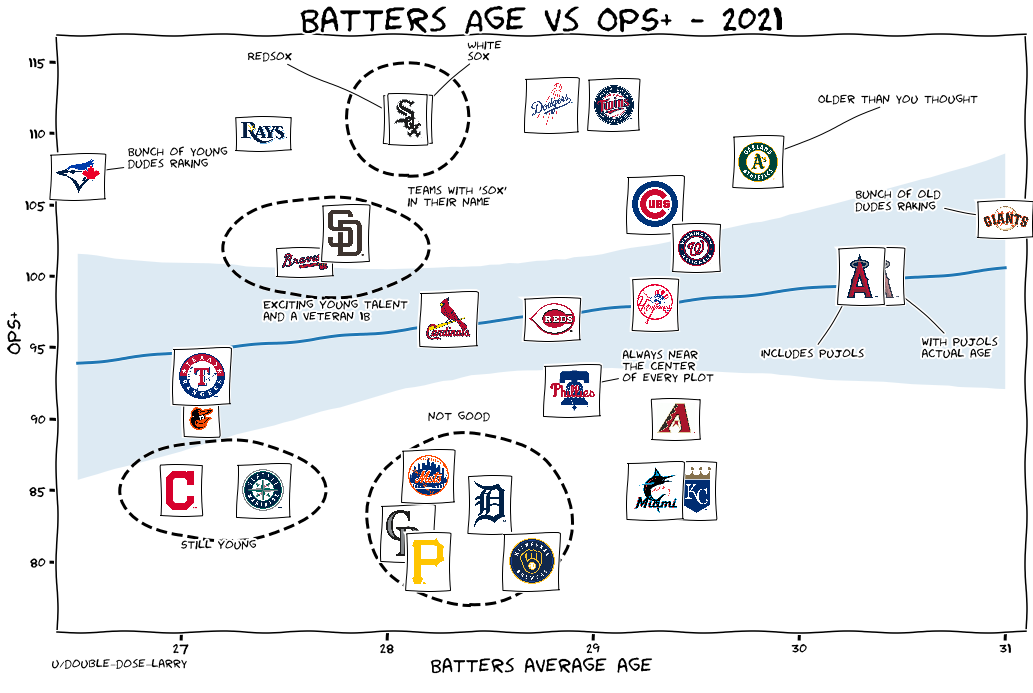

In [72]:
fig, ax = plt.subplots(figsize=(15,10))

x,y = plot_df["BatAge"], plot_df["ops_plus"]


sns.regplot(x, y)

# add joke about Pujol's age
pujols_joke = ax.add_artist(
        AnnotationBbox(getImage(f'LAA_faded.png'),
                      (30.4, 100)
                      )
    )


imgs = [
    ax.add_artist(
        AnnotationBbox(getImage(f'{tm.Tm}.png'),
                      (tm.BatAge, tm.ops_plus),
                       frameon=True
                      )
    )
    for tm in plot_df.itertuples()
]



## annotate the blue jays
tm = plot_df.query('Tm == "TOR"').iloc[0]
ax.annotate(
    "Bunch of young\ndudes raking",
    (tm["BatAge"], tm["ops_plus"]),
    size=12,
    xytext = (50, 10),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

## annotate the Giants
tm = plot_df.query('Tm == "SFG"').iloc[0]
ax.annotate(
    "Bunch of old\ndudes raking",
    (tm["BatAge"], tm["ops_plus"]),
    size=12,
    xytext = (-150, 10),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

# annotate the SEA and CLE
ax.add_patch(Ellipse(xy=(27.2,85), 
                     width=1, 
                     height=7, 
                     angle=0, fill=False, ls="--", lw=3))
ax.annotate(
    "Still Young",
    (27, 81),
    size=12
)

# annotate the SDP and ATL
ax.add_patch(Ellipse(xy=(27.7,102), 
                     width=1, 
                     height=7, 
                     angle=0, fill=False, ls="--", lw=3))
ax.annotate(
    "Exciting Young talent\nand a veteran 1B",
    (27.4, 97),
    size=12
)


# add joke about Pujol's age cont.

tm = plot_df.query('Tm == "LAA"').iloc[0]

ax.annotate(
    "Includes Pujols",
    (tm["BatAge"], tm["ops_plus"]),
    size=12,
    xytext = (-100, -80),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

ax.annotate(
    "with Pujols\nactual age",
    (tm["BatAge"] + .1, tm["ops_plus"]),
    size=12,
    xytext = (40, -80),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)


## annotate the OAK
tm = plot_df.query('Tm == "OAK"').iloc[0]
ax.annotate(
    "Older than you thought",
    (tm["BatAge"], tm["ops_plus"]),
    size=12,
    xytext = (60, 60),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

# annotate the not good
ax.add_patch(Ellipse(xy=(28.4,83), 
                     width=1, 
                     height=12, 
                     angle=0, fill=False, ls="--", lw=3))
ax.annotate(
    "not good",
    (28.2,90),
    size=12
)

## annotate the sox
tm = plot_df.query('Tm == "BOS"').iloc[0]
ax.annotate(
    "Redsox",
    (tm["BatAge"], tm["ops_plus"]),
    size=12,
    xytext = (-160, 60),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

tm = plot_df.query('Tm == "CHW"').iloc[0]
ax.annotate(
    "White\nsox",
    (tm["BatAge"], tm["ops_plus"]),
    size=12,
    xytext = (60, 60),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

ax.add_patch(Ellipse(xy=(28.1,111), 
                     width=.6, 
                     height=8, 
                     angle=0, fill=False, ls="--", lw=3))
ax.annotate(
    "teams with 'sox'\nin their name",
    (28.1,105),
    size=12
)

## annotate the phillies
tm = plot_df.query('Tm == "PHI"').iloc[0]
ax.annotate(
    "always near\nthe center\nof every plot",
    (tm["BatAge"], tm["ops_plus"]),
    size=12,
    xytext = (50, 10),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)


#sign
plt.annotate('u/double_dose_larry',
            xy=(.05, .05), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=12)

plt.xlim((26.4, 31.1))
plt.xlabel("Batters average age", size=20)
plt.ylabel("OPS+", size=20)
plt.title("Average Batters Age vs OPS+ - 2021", size=35)

plt.tight_layout()
plt.savefig("batage_ops_plus.png")
